
# Training YOLOv8 for Early Fire Detection on FLAME Aerial Dataset

## Steps

- Installation and Checks
- Custom Training
- Validate Custom Model
- Inference with Custom Model


## Installation and Checks

Install YOLOv8 via pip. Installs through ultralytics library because YOLOv8 is a framework within the library. This notebook was last compatibility tested with version **YOLOv8.0.20**.

In [7]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Setup complete ✅ (20 CPUs, 62.6 GB RAM, 86.9/195.8 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

Prepare custom images by labeling with bounding box coordinates as txt files in the format '0 {xmin} {ymin} {xmax} {ymax}'. The values are normalized to 0 and are floating point numbers. 

Then, split data into 3 sets: training, testing, and validation. Each set should have a images folder and a labels folder.

Lastly, create a configuration .yaml file as a directory for the model, and adjust epochs and images size as needed.

In [9]:
!yolo task=detect mode=train model=yolov8s.pt data="/home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/data.yaml" epochs=20 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

View the results of training with a confusion matrix, loss function metrics, and a batch of images.

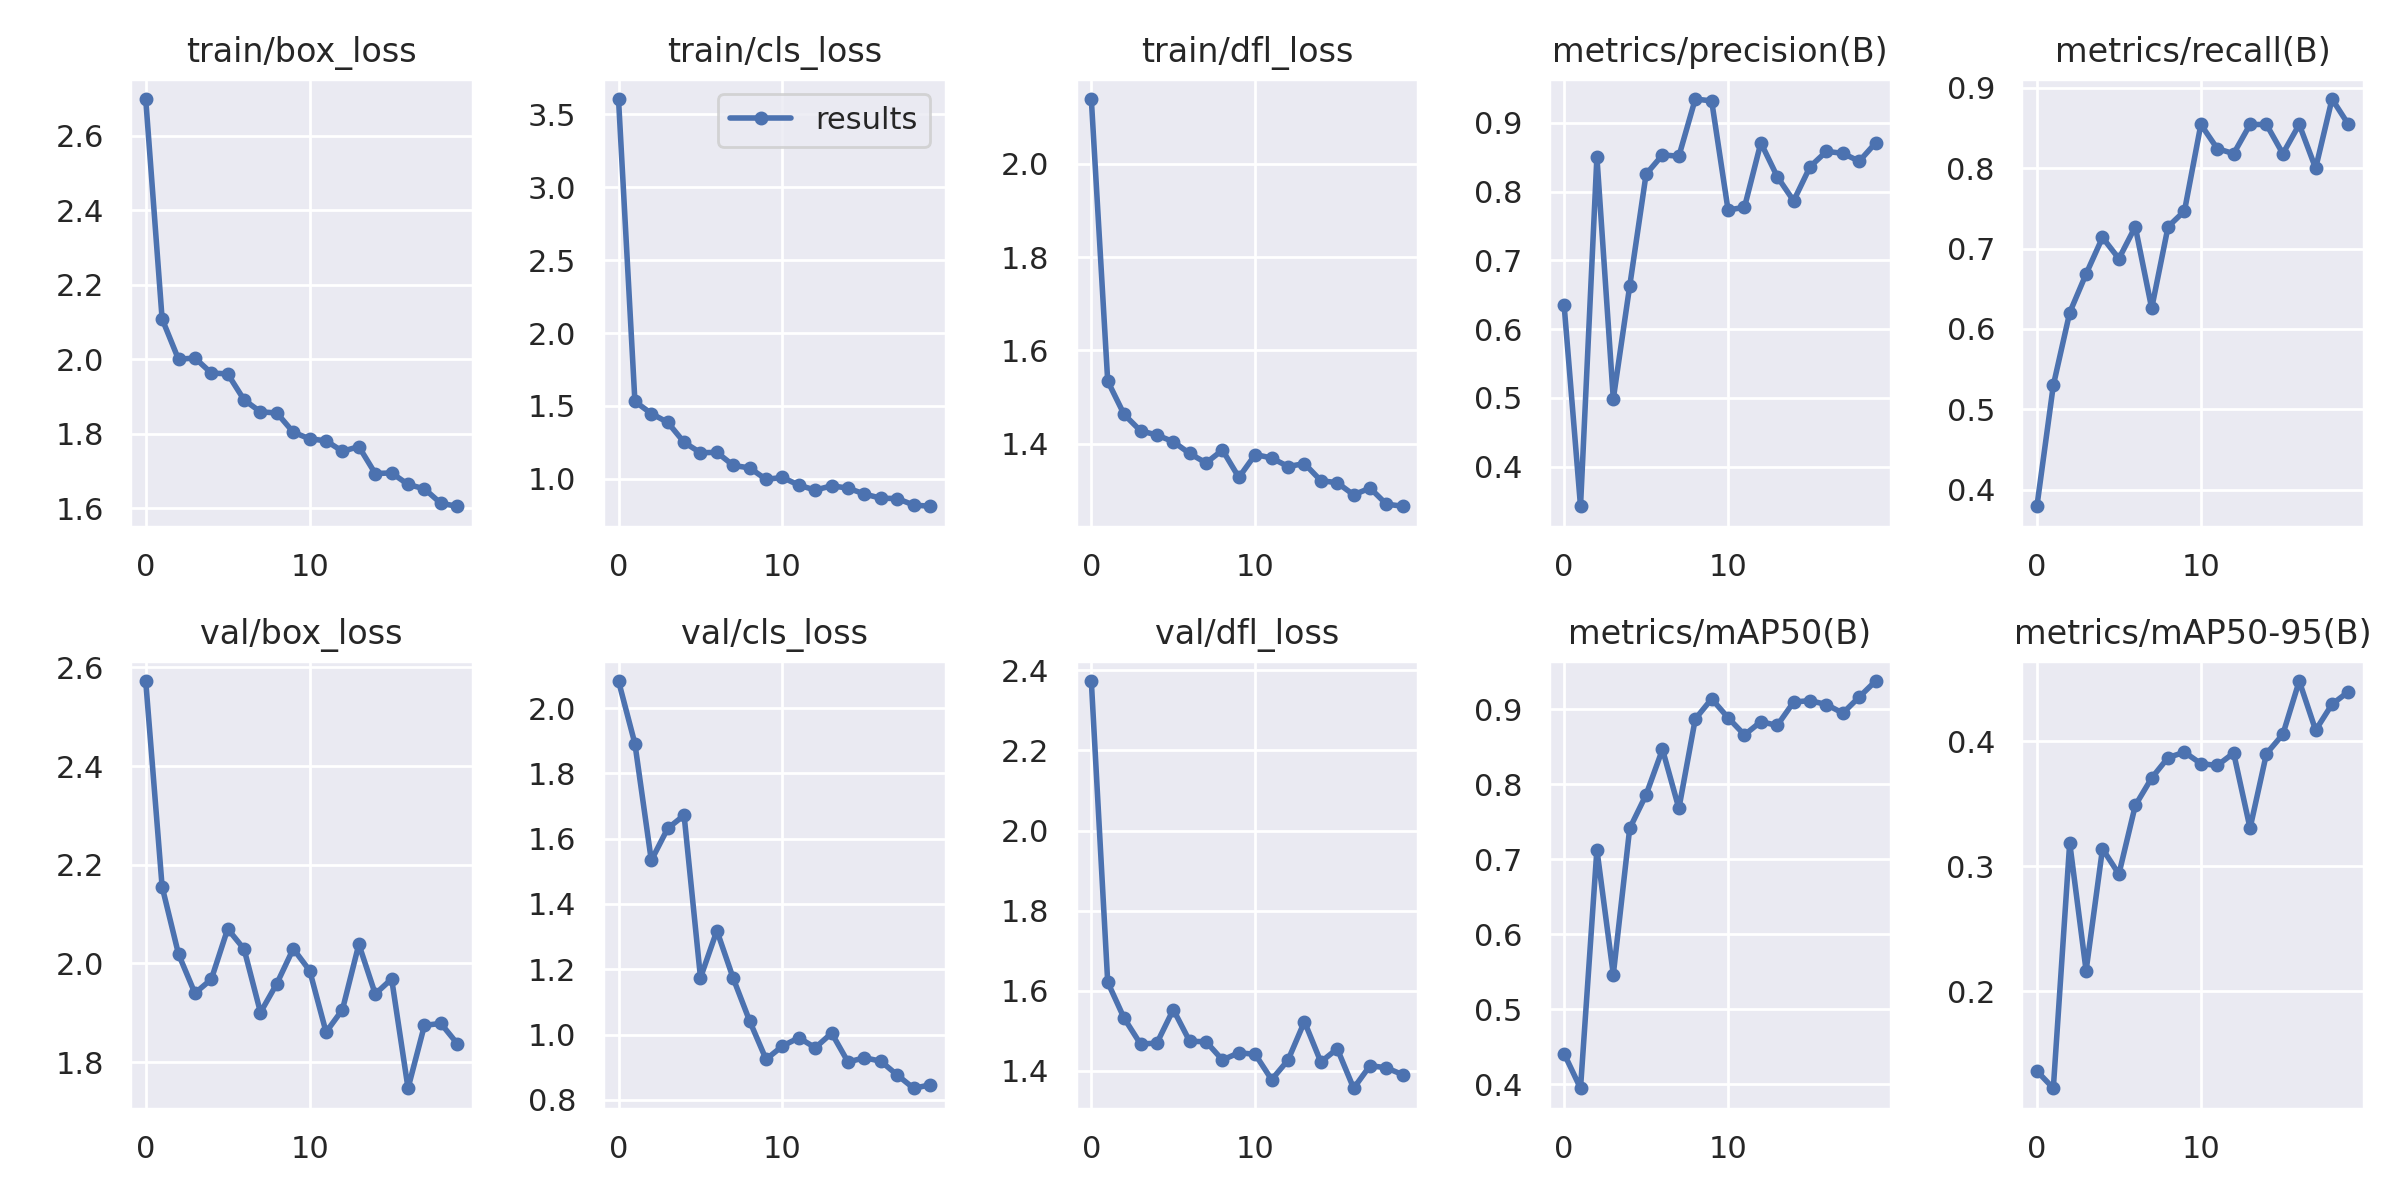

In [10]:
Image(filename=f'./runs/detect/train11/results.png', width=1000)

## Validate Custom Model

Validate the model with the weights from the training data.

In [11]:
!yolo task=detect mode=val model=./runs/detect/train11/weights/best.pt data="/home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/data.yaml"

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_anno
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20         55      0.874      0.855      0.913      0.449
Speed: 1.6ms pre-process, 34.0ms inference, 0.0ms loss, 2.8ms post-process per image


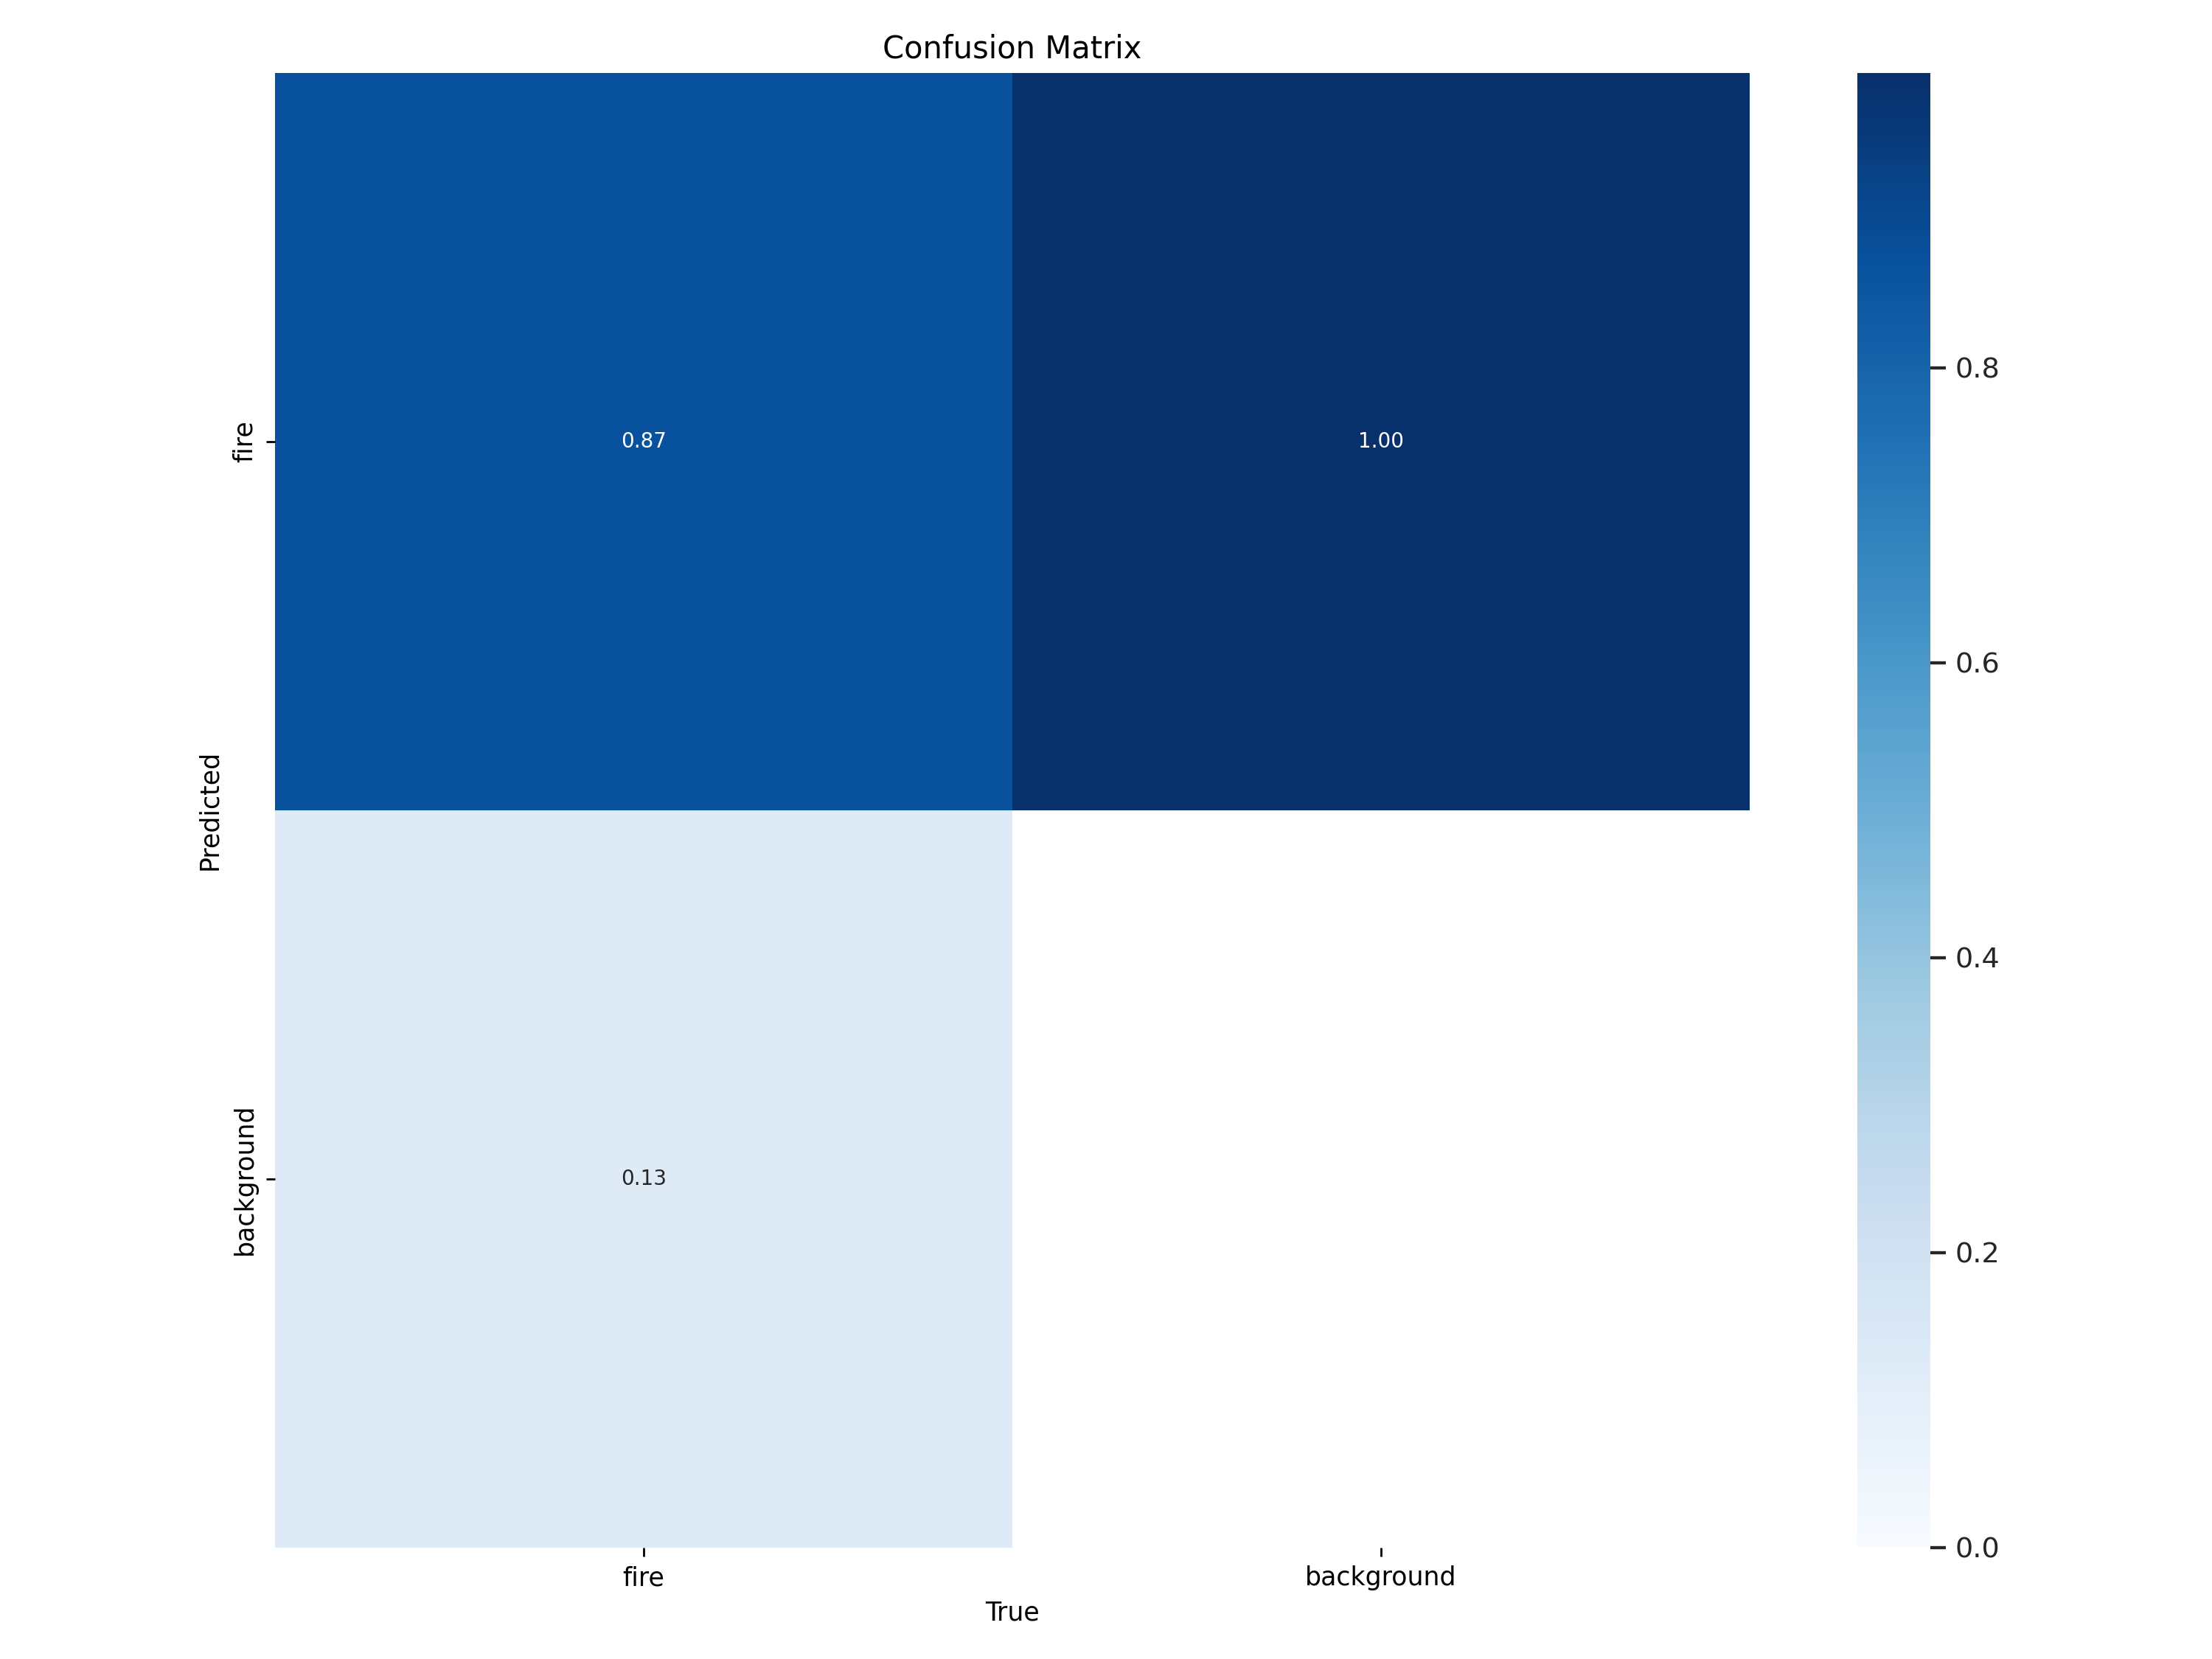

In [13]:
Image(filename=f'./runs/detect/val10/confusion_matrix.png', width=800)

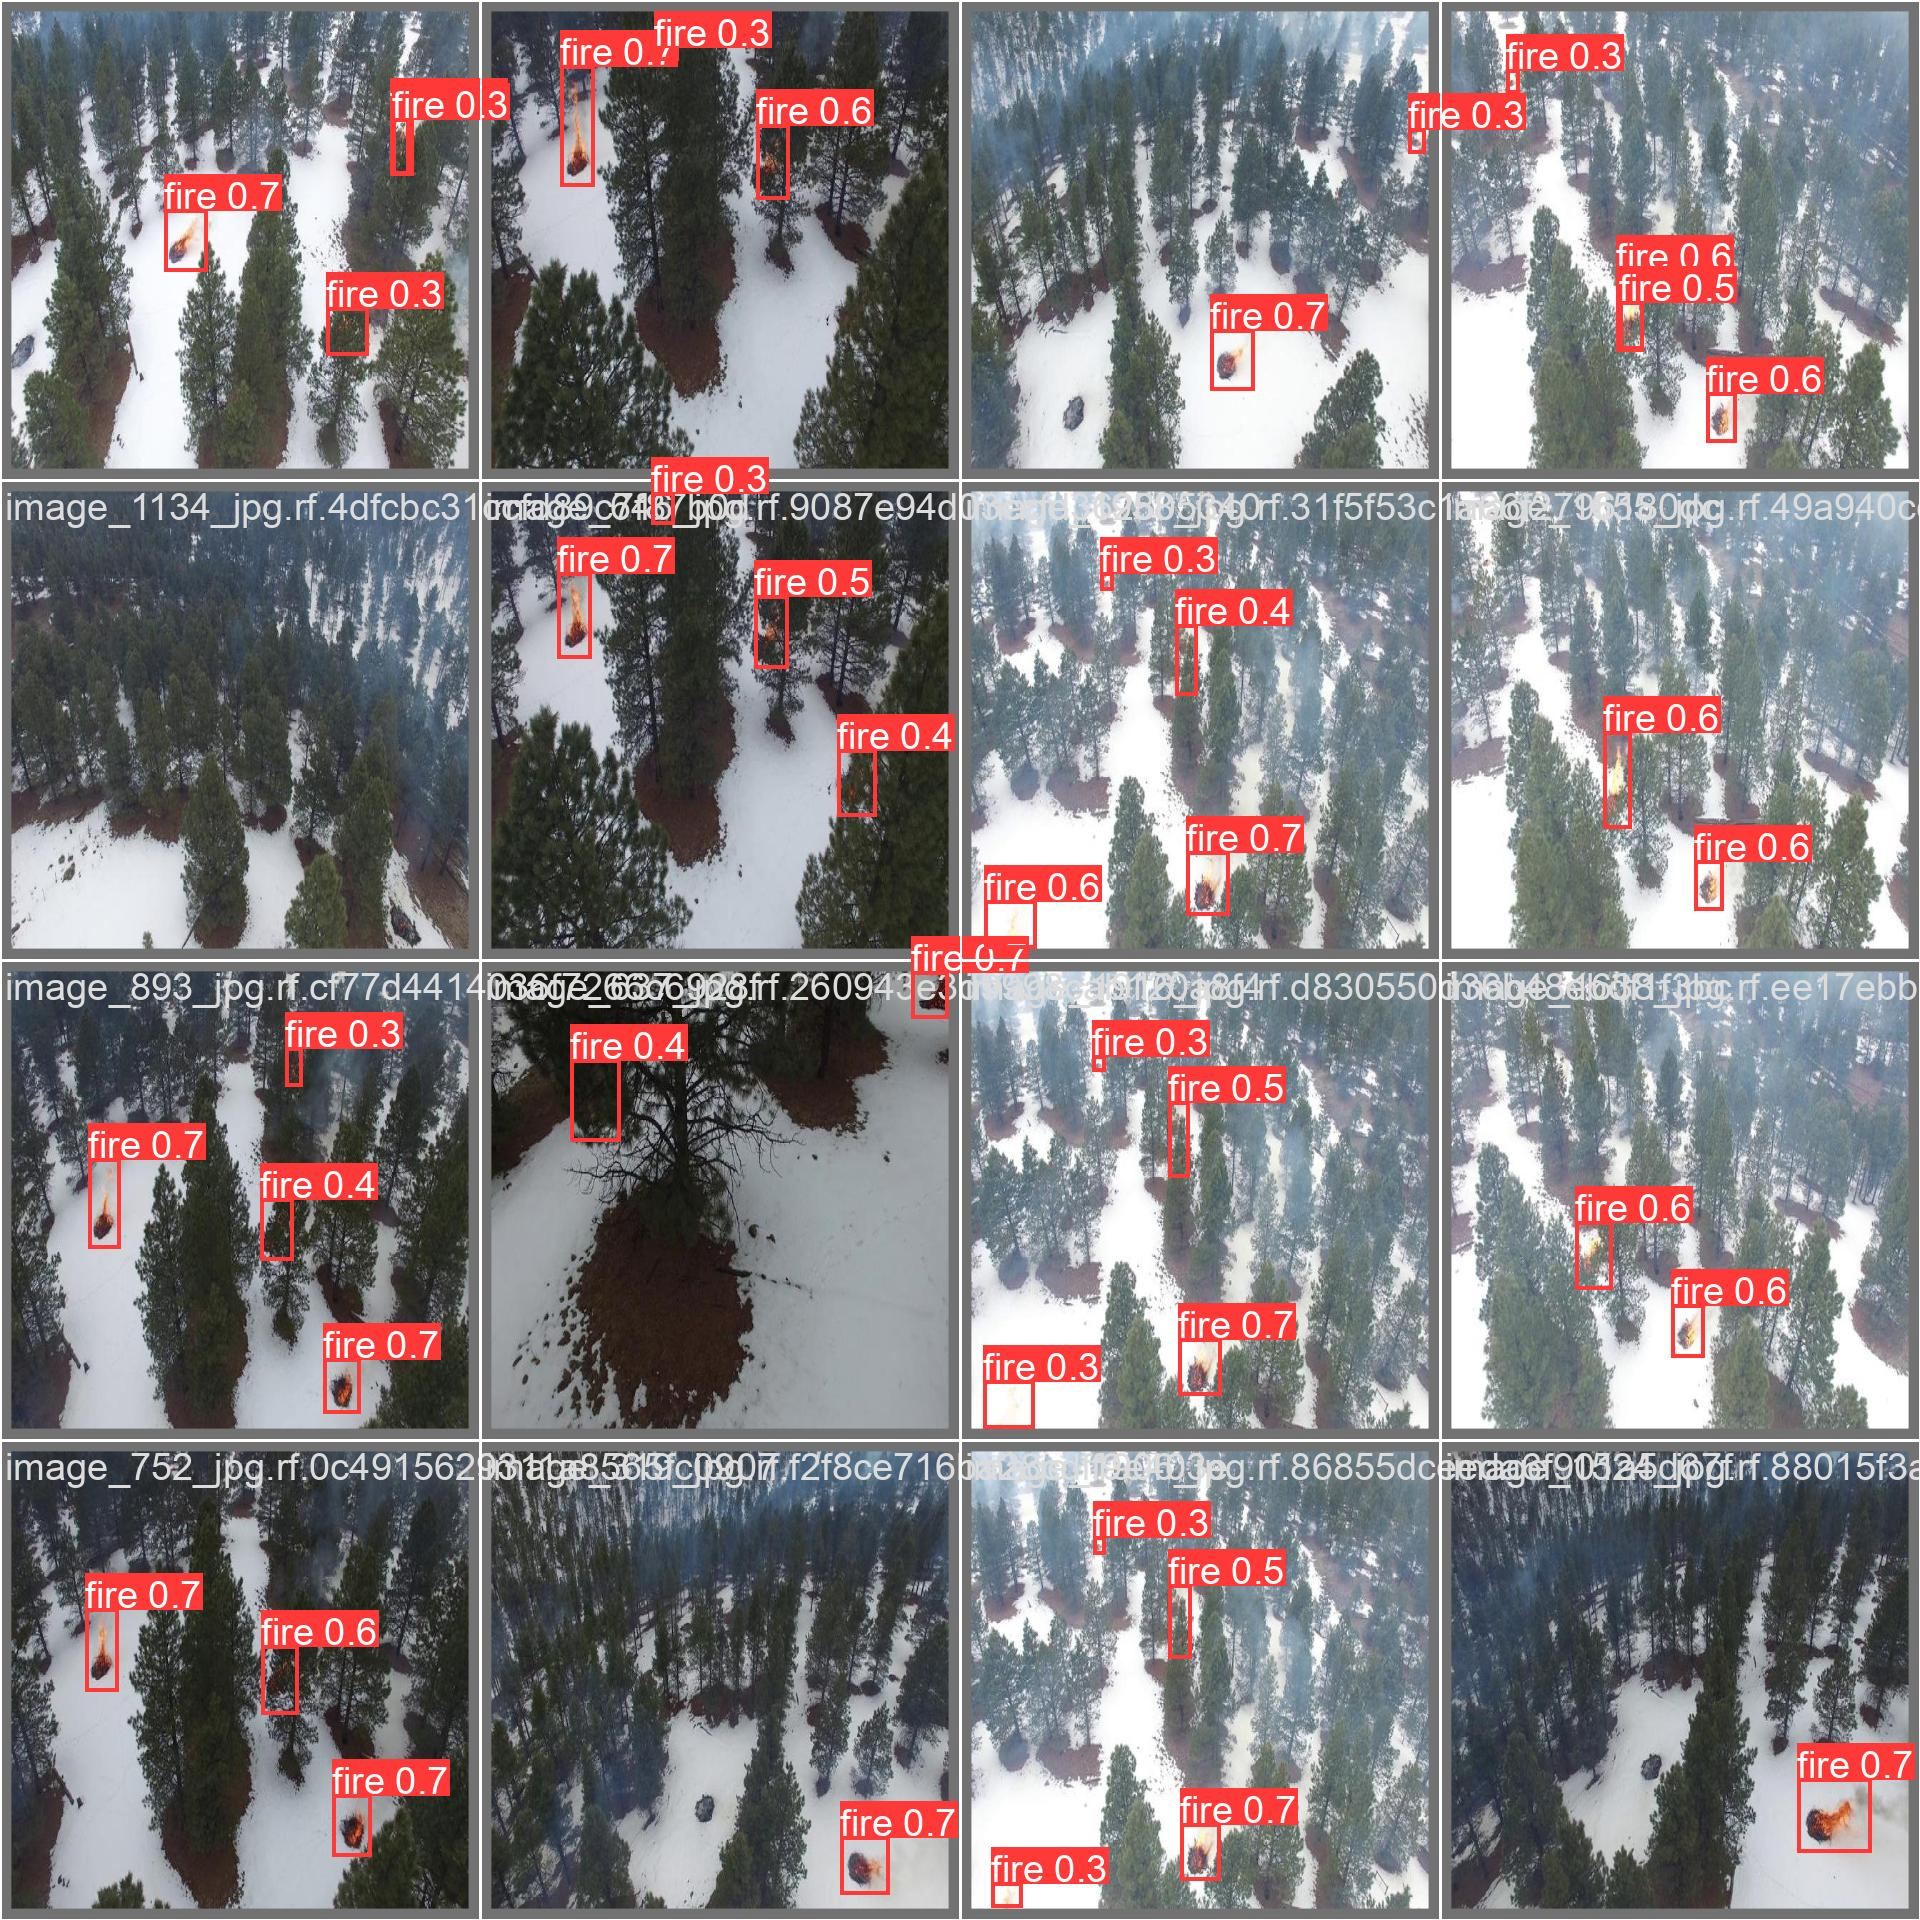

In [15]:
Image(filename=f'./runs/detect/val10/val_batch0_pred.jpg', width=1000)

## Inference with Custom Model

Infer by running on testing data and the same weights as above.

In [16]:
!yolo task=detect mode=predict model="./runs/detect/train11/weights/best.pt" conf=0.25 source="/home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/images" save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/images/image_1015_jpg.rf.d19feec94279b2413ce52f4a71b6ac75.jpg: 640x640 2 fires, 4.6ms
image 2/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/images/image_1076_jpg.rf.69f2a2d81f1098724d63ae09d8f13b71.jpg: 640x640 4 fires, 4.6ms
image 3/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/images/image_1151_jpg.rf.9dd03248c9d89db9af72b317017f100c.jpg: 640x640 3 fires, 4.5ms
image 4/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/images/image_1245_jpg.rf.11948c3fb8fe0c5dad979248256129fd.jpg: 640x640 3 fires, 4.6ms
image 5/20 /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/images/image_1

NOTE: To get evaluation metrics from the val mode on the test datatset, edit your .yaml file and replace the data in "valid:" with "test:" data. The split command is not valid yet in YOLOv8, so this is the only option for now. Then, move the results from the new runs/detect/val folder into the already existing predict folder from above for organization and revert the .yaml file.

In [21]:
!yolo task=detect mode=val model=./runs/detect/train11/weights/best.pt data="/home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/data.yaml"

Ultralytics YOLOv8.0.20 🚀 Python-3.9.18 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_anno
val: New cache created: /home/calvinzhou/py-workspace/a2d2/YOLOv8-data/datasets/flame_annotated_v6i/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20         56      0.949      0.768      0.893      0.391
Speed: 1.6ms pre-process, 33.4ms inference, 0.0ms loss, 3.0ms post-process per image


Take a look at few results.

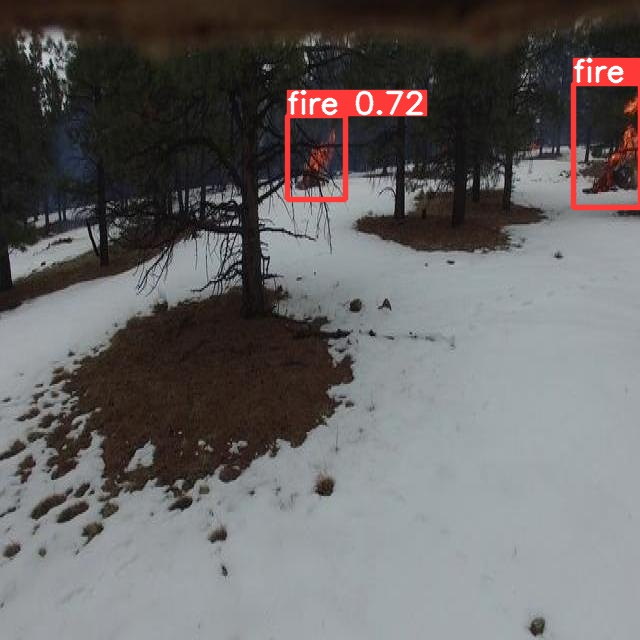

./runs/detect/predict10/image_168_jpg.rf.034a0a62657ff918227c94e06fc51251.jpg




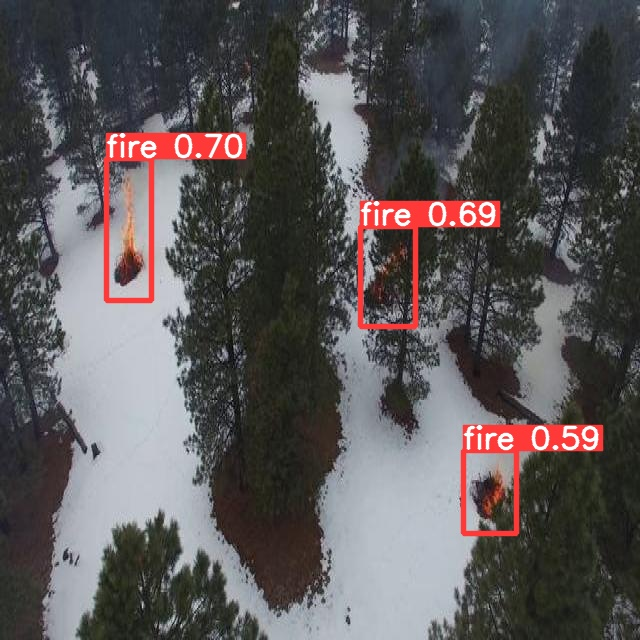

./runs/detect/predict10/image_686_jpg.rf.a8f2e35885d149e5e85dbf0c5fd2e225.jpg




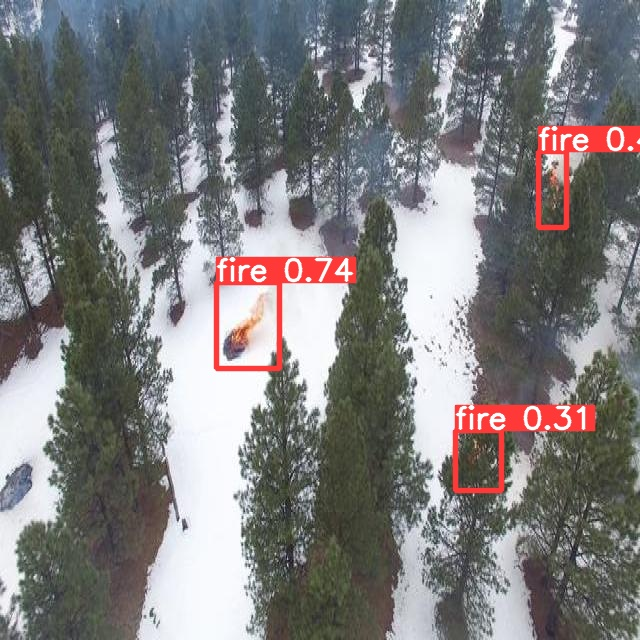

./runs/detect/predict10/image_1151_jpg.rf.9dd03248c9d89db9af72b317017f100c.jpg




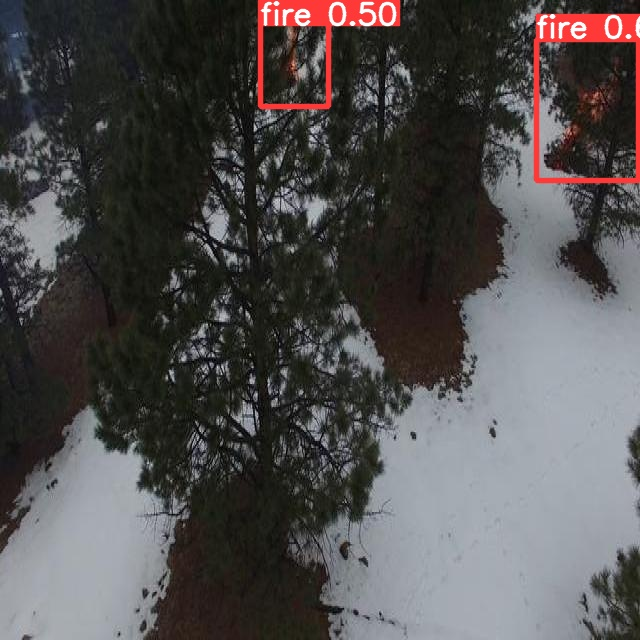

./runs/detect/predict10/image_524_jpg.rf.1f8ce0a73787d3b5578f1b811b564ff5.jpg




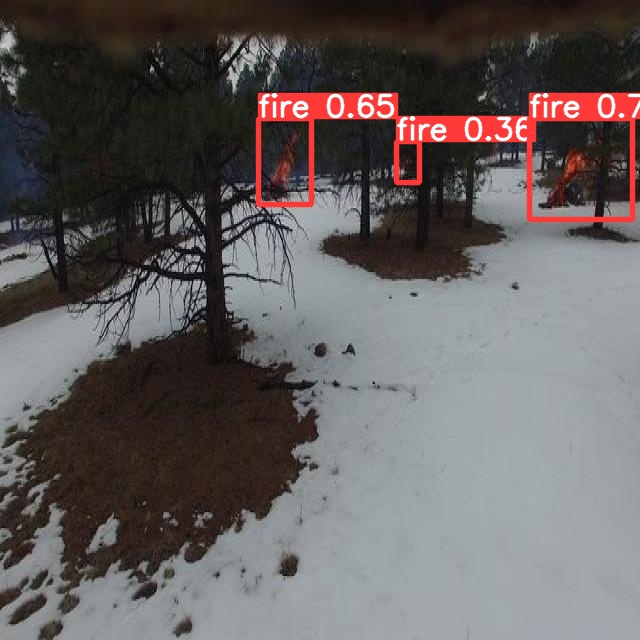

./runs/detect/predict10/image_242_jpg.rf.10c90a5305aa76bf6a3698405273b13a.jpg




In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'./runs/detect/predict10/*.jpg')[:5]:
      display(Image(filename=image_path, width=800))
      print(image_path)
      print("\n")